# Logistic Regression: Intuition

In this notebook, we discuss the intuition behind Logistic Regression, before diving into application.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>
2. <a href='https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function'>Sigmoid Function</a>

Logistic Regression can be a useful machine learning algorithm for classifying objects into one of two categories.  For example, suppose we want to predict whether someone will buy a product based on their age.  After gathering data, we can plot which age groups did buy the product, and which age groups did not buy the product.

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
# Create features
X = np.arange(start=20, stop=96, step=5)

# Create labels
y0 = [0 for i in range(8)]
y1 = [1 for i in range(8)]
y = np.array(y0 + y1)

# Change individual datapoints for variety
y[3], y[-4] = 1, 0

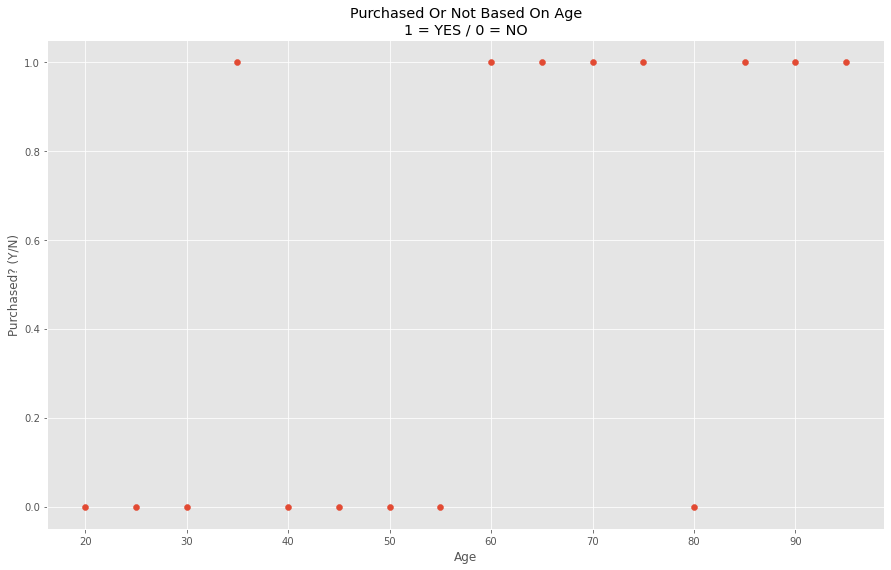

Figure 1.


In [3]:
# Create figure
plt.figure(figsize=(15,9))

# Plot data
plt.scatter(X, y)

# Add title
plt.title('Purchased Or Not Based On Age\n1 = YES / 0 = NO')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Purchased? (Y/N)')

# Show graph
plt.show()

print('Figure 1.')

Intuitively, in Figure 1 we can see that there is a correlation between a person's age, and whether they brought the product, even if a few points behave unexpectedly.  Specifically, we can see that folks 55 and under typically do not buy this product, while folks 60 and older do buy this product.  Let's see what would happen if we try to use simple linear regression to model this situation.

In [4]:
# Calculate linear regression line
m,b = np.polyfit(X,y,1)

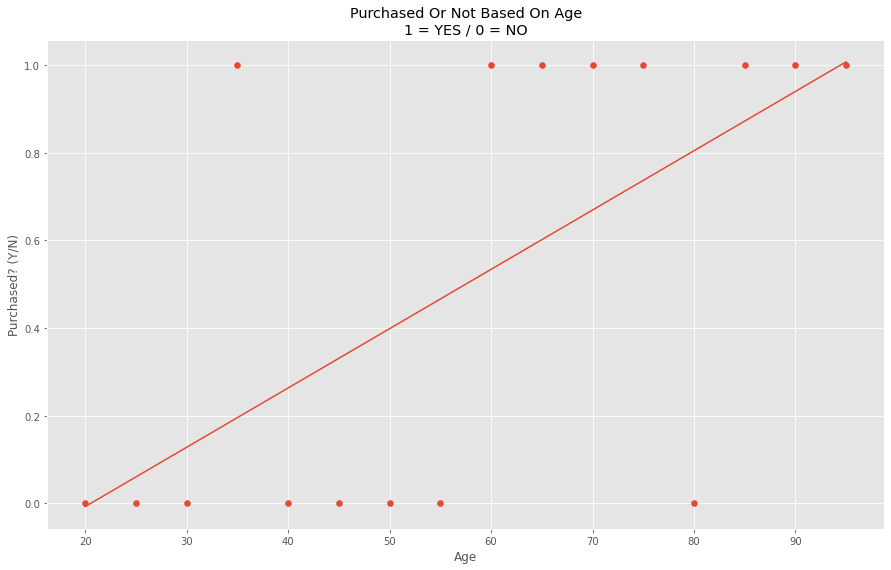

Figure 2.


In [5]:
# Create figure
plt.figure(figsize=(15,9))

# Plot data
plt.scatter(X, y)
plt.plot(X, m*X+b)

# Add title
plt.title('Purchased Or Not Based On Age\n1 = YES / 0 = NO')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Purchased? (Y/N)')

# Show graph
plt.show()

print('Figure 2.')

In Figure 2 we observe that a simple linear regression line isn't very meaningful.  Recall from linear regression that we don't want just any line, we want the *best-fit* line.  While this line moves up along the $y$-axis, the datapoints themselves sit at only one $y$-coordinate.  What if we tried flattening this line out then to make it *fit better*?

In [6]:
# Import dependency
from sklearn.linear_model import LogisticRegression

In [7]:
# Initialize logistic regression classifier
classifier = LogisticRegression(random_state=0)

In [8]:
# Define logistic regression model
model = classifier.fit(X.reshape(-1,1), y.ravel())

# Define classes
classes = model.predict(X.reshape(-1,1))

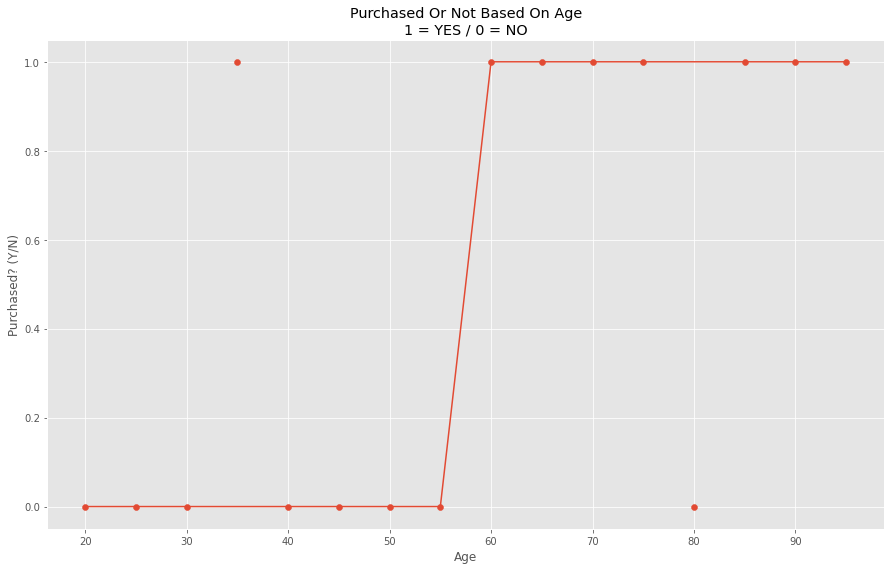

Figure 3.


In [9]:
# Create figure
plt.figure(figsize=(15,9))

# Plot data
plt.scatter(X, y)
plt.plot(X, classes)

# Add title
plt.title('Purchased Or Not Based On Age\n1 = YES / 0 = NO')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Purchased? (Y/N)')

# Show graph
plt.show()

print('Figure 3.')

As seen in Figure 3, this type of curve models the data much better than a straight line, and this is the curve we are calculating in logistic regression.  This curve is the characteristic shape of a Sigmoid Function.  Sigmoid Functions have the property of mapping the number line into a small range, such as between 0 and 1; such a range may then be interpreted as a probability, (for example the probability of a targeted individual purchasing a product).$^2$

Going back to the line modeled in Figure 2, we recall that the equation of a simple linear regression line is:

$$
y = b_0 + b_1x
$$

Now let us consider the logistic Sigmoid Function$^2$, which has the following equation:

$$
p = \frac{1}{1+e^{-y}}
$$

If we solve this for $y$, we get the following:

$$
\rightarrow p(1+e^{-y}) = 1 \\~\\
\rightarrow 1+e^{-y} = \frac{1}{p} \\~\\
\rightarrow e^{-y} = \frac{1}{p} - 1 \\~\\
\rightarrow e^{-y} = \frac{1}{p} - \frac{p}{p} \\~\\
\rightarrow e^{-y} = \frac{1-p}{p} \\~\\
\rightarrow -y = \ln(\frac{1-p}{p}) \\~\\
\rightarrow y = -\ln(\frac{1-p}{p}) \\~\\
\rightarrow y = \ln(\frac{p}{1-p}) \\~\\
$$

We can then replace the $y$ in our linear regression equation:

$$
\ln(\frac{p}{1 - p}) = b_0 + b_1x
$$

Alternatively, we may consider $y$ in the Sigmoid Logistic function mapping:

$$
p = \frac{1}{1+e^{-(b_0 + b_1x)}}
$$

This is the formula for logistic regression, and the formula that gives us the logistic curve rather than a straight line.  The Sigmoid Function maps all output values to a value in a specified range, such as  0 to 1, or -1 to 1, depending on the specific type of Sigmoid Function; therefore, outputs from a logistic Sigmoid Function—in the range of 0 to 1—may be interpreted as probabilities.$^2$

As we consider more input features, we use additional variables (with the coefficients) as necessary:

$$
p = \frac{1}{1+e^{-(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}}
$$

We then use the output probability to categorize observations into one class or another.  Consider Figure 4:

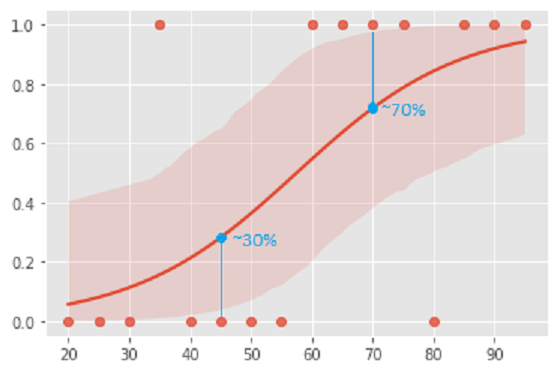
<center>Figure 4.</center>

First, we determine a threshold, which is generally 50%.  If an observation has a probability less than the threshold, then we classify it as 0, or "no," and if the observation has a probabiltiy greater than the threshold, then we classify it as 1, or "yes."  In Figure 4, the individual with an age of 45 has about a 30% probabiltiy of buying the product; because this does not exceed our 50% threshold, we classify this individual as "will not purchase the product."  The individual with an age of 70 has about a 70% probability of buying the product; because this exceeds the 50% threshold, we classify this individual as "will buy the product."

## Parking Lot Notes

You can use the regplot() function in seaborn to do this quickly and easily

In [10]:
# Import dependencies
import seaborn as sns

<AxesSubplot:>

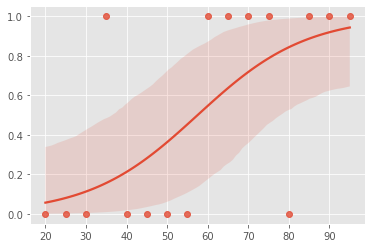

In [11]:
# Plot data
sns.regplot(x=X, y=y, logistic = True, )